 # Performed customer segmentation using K-Means clustering on mall customer data. Applied PCA and t-SNE for visualization and developed targeted marketing strategies for each customer segment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Mall_Customers.csv")

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
sns.countplot(x='Gender', data=df)
plt.show()

ValueError: Could not interpret value `Gender` for `x`. An entry with this name does not appear in `data`.

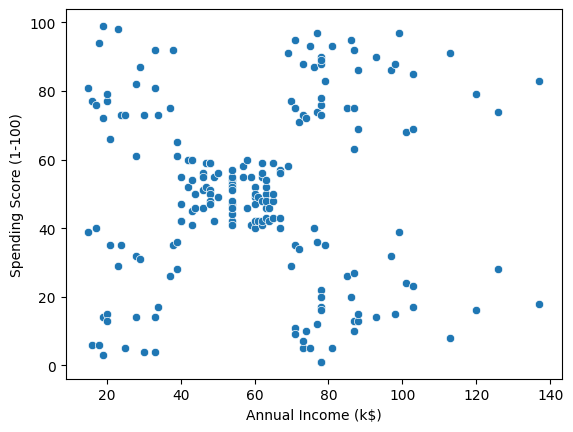

In [10]:
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    data=df
)
plt.show()


In [11]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters

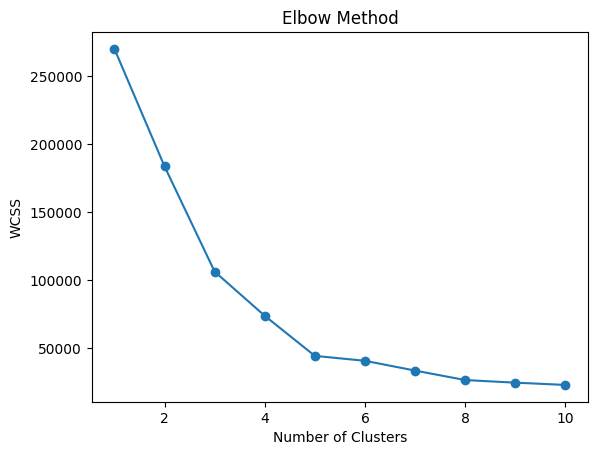

In [12]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [13]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)

df['Cluster'] = clusters
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


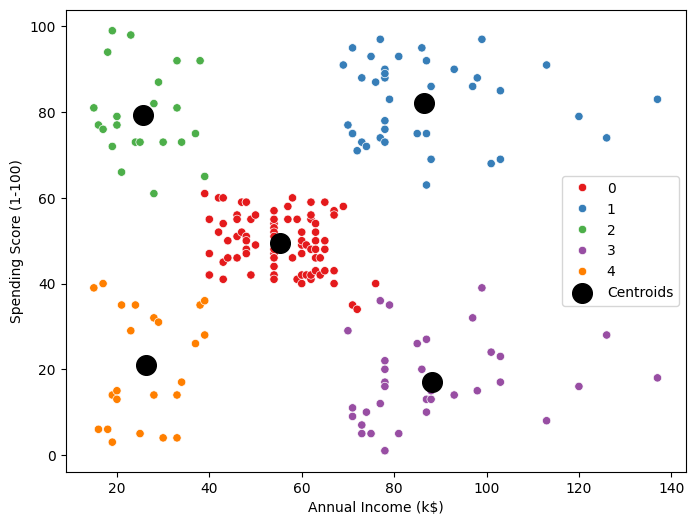

In [15]:
plt.figure(figsize=(8,6))

sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='Cluster',palette='Set1',data=df)

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='black',label='Centroids')

plt.legend()
plt.show()


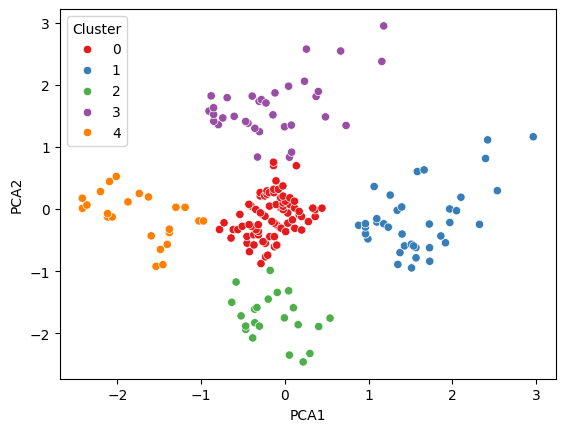

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:,0]
df['PCA2'] = X_pca[:,1]

sns.scatterplot(x='PCA1',y='PCA2',hue='Cluster',palette='Set1',data=df)
plt.show()


In [17]:
df.groupby('Cluster')[['Annual Income (k$)','Spending Score (1-100)']].mean()


,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


In [20]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", score)

Silhouette Score: 0.5546571631111091


In [21]:
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)','Spending Score (1-100)']].mean()
print(cluster_summary)

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


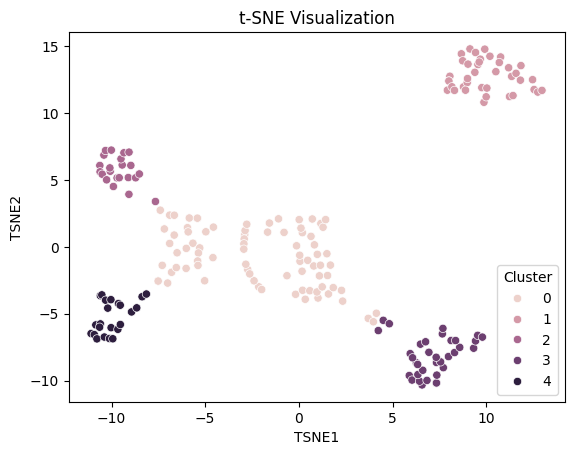

In [22]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

df['TSNE1'] = X_tsne[:,0]
df['TSNE2'] = X_tsne[:,1]

sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=df)
plt.title("t-SNE Visualization")
plt.show()
